In [8]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from gensim.models import CoherenceModel
from gensim import corpora, models
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import numpy as np
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from nltk import word_tokenize, bigrams

In [2]:
#open txt file
with open ('/Users/huopeiyang/Desktop/Calvino, Italo - Invisible Cities (transl. William Weaver) (2012) - libgen.li.txt') as in_file:
    text=in_file.read()


In [6]:
regex = r"\n[A-Z]+[\s&]*[A-Z\s]+\s*[0-9]\s*\n\n(.+?)\n\n\n"
content_each=re.findall(regex, text)

In [ ]:

stopwords_update=['penates', 'lares','one', 'diomira', 'isidora', 'dorothea', 'zaira', 'anastasia', 'tamara', 'zora', 'despina', 'zirma', 'isaura', 'maurilia', 'fedora', 'zoe', 'zenobia', 'euphemia', 'zobeide', 'hypatia', 'armilla', 'chloe', 'valdrada', 'olivia', 'sophronia', 'eutropia', 'zemrude', 'aglaura', 'octavia', 'ersilia', 'baucis', 'leandra', 'melania', 'esmeralda', 'phyllis', 'pyrrha', 'adelma', 'eudoxia', 'moriana', 'clarice', 'eusapia', 'beersheba', 'leonia', 'irene', 'argia', 'thekla', 'trude', 'olinda', 'laudomia', 'perinthia', 'procopia', 'raissa', 'andria', 'cecilia', 'marozia', 'penthesilea', 'theodora', 'berenice']



In [18]:
class TextPipeline:
    def __init__(self, list_loaded):
        self.list_loaded = list_loaded
        self.stopwords_update = ['diomira', 'isidora', 'dorothea', 'zaira', 'anastasia', 'tamara', 'zora', 'despina', 'zirma', 'isaura', 'maurilia', 'fedora', 'zoe', 'zenobia', 'euphemia', 'zobeide', 'hypatia', 'armilla', 'chloe', 'valdrada', 'olivia', 'sophronia', 'eutropia', 'zemrude', 'aglaura', 'octavia', 'ersilia', 'baucis', 'leandra', 'melania', 'esmeralda', 'phyllis', 'pyrrha', 'adelma', 'eudoxia', 'moriana', 'clarice', 'eusapia', 'beersheba', 'leonia', 'irene', 'argia', 'thekla', 'trude', 'olinda', 'laudomia', 'perinthia', 'procopia', 'raissa', 'andria', 'cecilia', 'marozia', 'penthesilea', 'theodora', 'berenice']
        self.stopwords_update_bi = ['polo','marco','khan','invisible','city','italo','calvino']
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return 'a'
        elif tag.startswith('V'):
            return 'v'
        elif tag.startswith('N'):
            return 'n'
        elif tag.startswith('R'):
            return 'r'
        else:
            return 'n'

    def text_preprocess(self, content):
        tokens = word_tokenize(content)
        tokens = [token.lower() for token in tokens if token.isalpha() and token not in ".,?!:;()[]''``*"]
        tokens_tagged = pos_tag(tokens)
        tokens_lem = [self.lemmatizer.lemmatize(token, self.get_wordnet_pos(tag)) for token, tag in tokens_tagged]
        tokens_fin = [token for token in tokens_lem if not token in self.stop_words and token not in self.stopwords_update]
        return tokens_fin

    def text_preprocess_bigram(self, content):
        tokens = word_tokenize(content)
        tokens = [token.lower() for token in tokens]
        tokens_tagged = pos_tag(tokens)
        tokens_lem = [self.lemmatizer.lemmatize(token, self.get_wordnet_pos(tag)) for token, tag in tokens_tagged]
        tokens_fin = [token for token in tokens_lem if not token in self.stop_words and token not in self.stopwords_update_bi]
        return tokens_fin

    def process(self):
        LDA_documents = [self.text_preprocess(each) for each in self.list_loaded]
        tokenized_docs = [word_tokenize(doc) for doc in self.list_loaded]
        tokenized_docs_clean = []

        for doc in tokenized_docs:
            nest = []
            for token in doc:
                token_tagged = pos_tag([token])
                for token, tag in token_tagged:
                    lem = self.lemmatizer.lemmatize(token.lower(), self.get_wordnet_pos(tag.lower()))
                    if lem not in self.stop_words and lem not in self.stopwords_update_bi:
                        nest.append(lem)
            tokenized_docs_clean.append(nest)

        bigrams_docs = [[bigram for bigram in list(bigrams(tokens)) if bigram[0].isalpha() and bigram[1].isalpha()] for tokens in tokenized_docs_clean]
        bigrams_docs = [['_'.join(bigram) for bigram in doc_bigrams] for doc_bigrams in bigrams_docs]

        import copy
        bi_tokens = copy.deepcopy(LDA_documents)
        for i in range(len(bigrams_docs)):
            bi_tokens[i].extend(bigrams_docs[i])

        return bi_tokens

In [19]:
pipeline = TextPipeline(content_each)
processed_text = pipeline.process()

In [20]:
dictionary = corpora.Dictionary(processed_text)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]
num_topics = 14

lda = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=5,
                     alpha='auto',
                     random_state=33,
                     per_word_topics=True)
# Print the topics and their top words
for topic in lda.print_topics():
    print(topic)
    
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

(0, '0.316*"go" + 0.247*"know" + 0.206*"among" + 0.055*"day" + 0.052*"come" + 0.046*"say" + 0.045*"follow" + 0.003*"take" + 0.003*"every" + 0.003*"street"')
(1, '0.247*"time" + 0.177*"different" + 0.118*"place" + 0.080*"inhabitant" + 0.079*"know" + 0.057*"take" + 0.048*"follow" + 0.040*"go" + 0.038*"every" + 0.029*"day"')
(2, '0.147*"follow" + 0.147*"inhabitant" + 0.147*"time" + 0.147*"take" + 0.147*"say" + 0.147*"day" + 0.010*"come" + 0.010*"every" + 0.010*"house" + 0.010*"place"')
(3, '0.218*"day" + 0.149*"street" + 0.112*"every" + 0.072*"follow" + 0.064*"inhabitant" + 0.052*"place" + 0.052*"take" + 0.044*"say" + 0.042*"time" + 0.037*"two"')
(4, '0.196*"take" + 0.170*"inhabitant" + 0.132*"go" + 0.126*"place" + 0.104*"time" + 0.068*"come" + 0.055*"every" + 0.047*"two" + 0.037*"make" + 0.036*"follow"')
(5, '0.156*"house" + 0.132*"among" + 0.118*"come" + 0.098*"make" + 0.091*"take" + 0.087*"two" + 0.075*"wall" + 0.050*"place" + 0.041*"go" + 0.038*"day"')
(6, '0.056*"street" + 0.056*"eve

In [21]:
coherence_model=[]
perplexity_list=[]
dictionary = corpora.Dictionary(processed_text)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]
for number in range(1,30):
    num_topics = number
    lda_model_range = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=10,
                     random_state=33,
                     alpha='auto',
                     per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model_range,
                                     texts=processed_text,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    coherence_model.append(coherence)
    perplexity = lda_model_range.log_perplexity(corpus)
    perplexity_list.append(perplexity)
# Plot the coherence scores


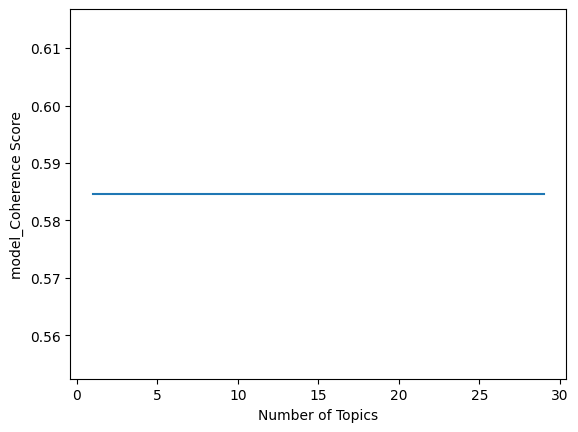

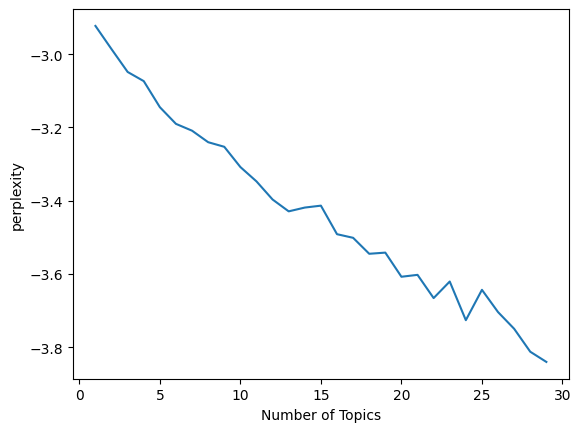

In [22]:
x = np.arange(1, 30)
plt.plot(x, coherence_model)
plt.xlabel("Number of Topics")
plt.ylabel("model_Coherence Score")
plt.show() 

# Plot the perplexity
x = np.arange(1, 30)
plt.plot(x, perplexity_list)
plt.xlabel("Number of Topics")
plt.ylabel("perplexity")
plt.show()